# ANÁLISIS DE LA PRIMERA EVALUACIÓN
## IES Puerto de la Cruz - Telesforo Bravo | Curso 2017-2018

In [34]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML

In [35]:
df = pd.read_excel("data_2017.xlsx", index_col=0, sheet_name="EVAL1")
df.head()

,stage,success,ratio
group,,,
ESO1A,ESO,32,25
ESO1B,ESO,44,22
ESO1C,ESO,44,25
ESO1D,ESO,46,27
ESO2A,ESO,24,29


In [36]:
def get_data_by_stages(stages):
    if not isinstance(stages, list):
        stages = [stages]
    return df[df["stage"].isin(stages)]

In [37]:
def draw_academic_rate(df, fontsize=20, value_margin=3):
    plt.figure(figsize=(30, 10), dpi=96)
    sns.barplot(df.index, df["success"])
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(fontsize=fontsize)
    ax = plt.gca()
    # show rate percentage on bars
    for i, value in enumerate(df["success"]):
        ax.text(i, value - value_margin,
                f"{value:,.0f}%", ha="center", fontsize=fontsize, color="w")
    # hide chart frame
    for spine in ax.spines.values():
        spine.set_visible(False)
    # hide ticks
    plt.tick_params(top="off", bottom="off", left="off",
                    right="off", labelleft="off", labelbottom="on")

# ESO + FPB

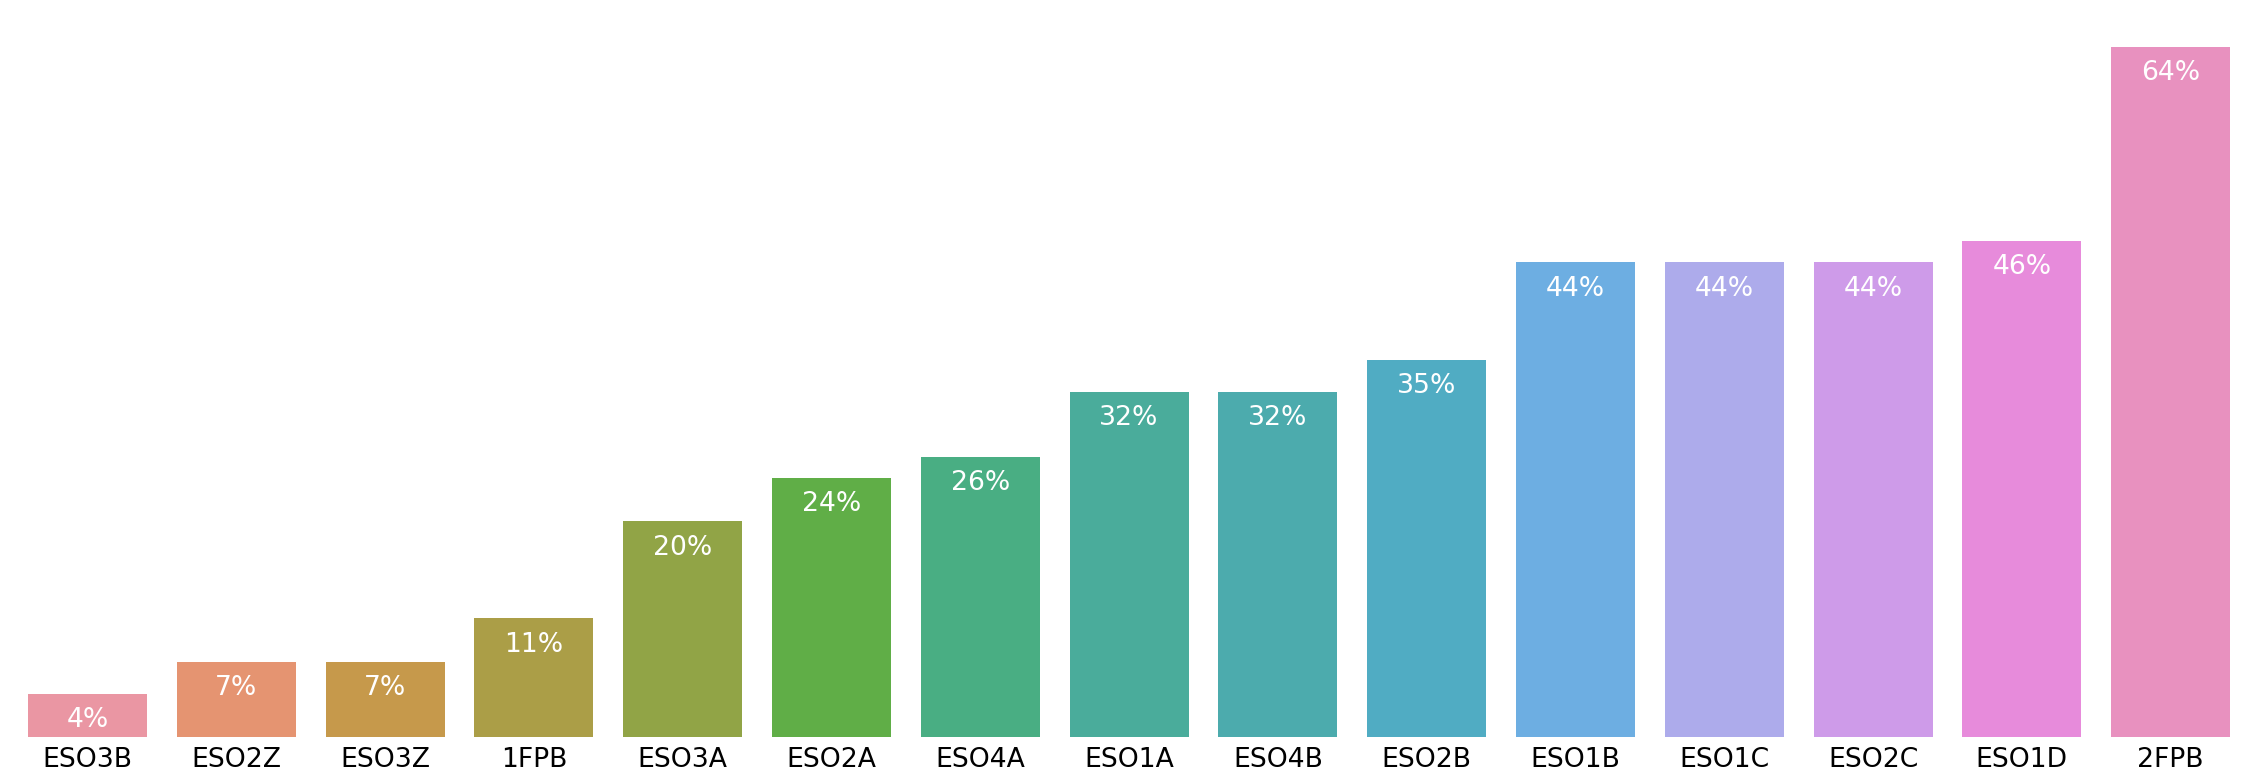

In [38]:
df_ESOFPB = get_data_by_stages(["ESO", "FPB"])
draw_academic_rate(df_ESOFPB.sort_values("success"))

In [39]:
df_ESOFPB.mean()

success    29.333333
ratio      22.400000
dtype: float64

# BACHILLERATO

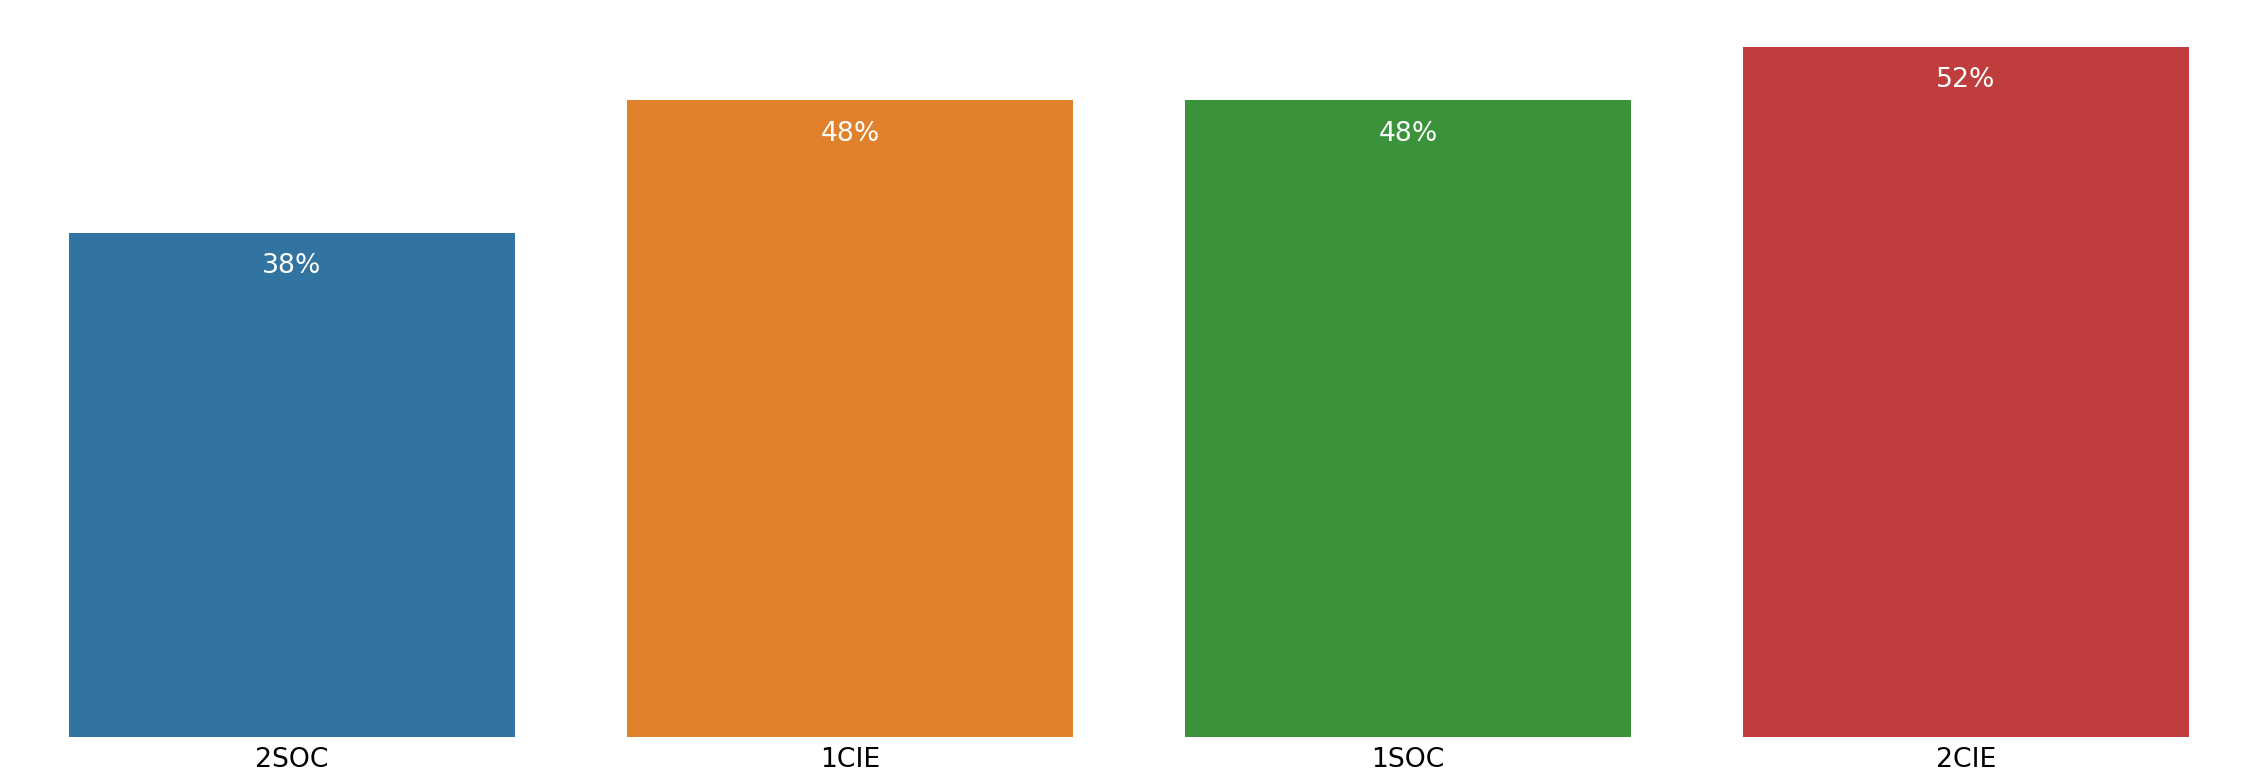

In [40]:
df_BACH = get_data_by_stages("BACH")
draw_academic_rate(df_BACH.sort_values("success"))

In [41]:
df_BACH.mean()

success    46.50
ratio      24.25
dtype: float64

# CICLOS FORMATIVOS DE GRADO MEDIO

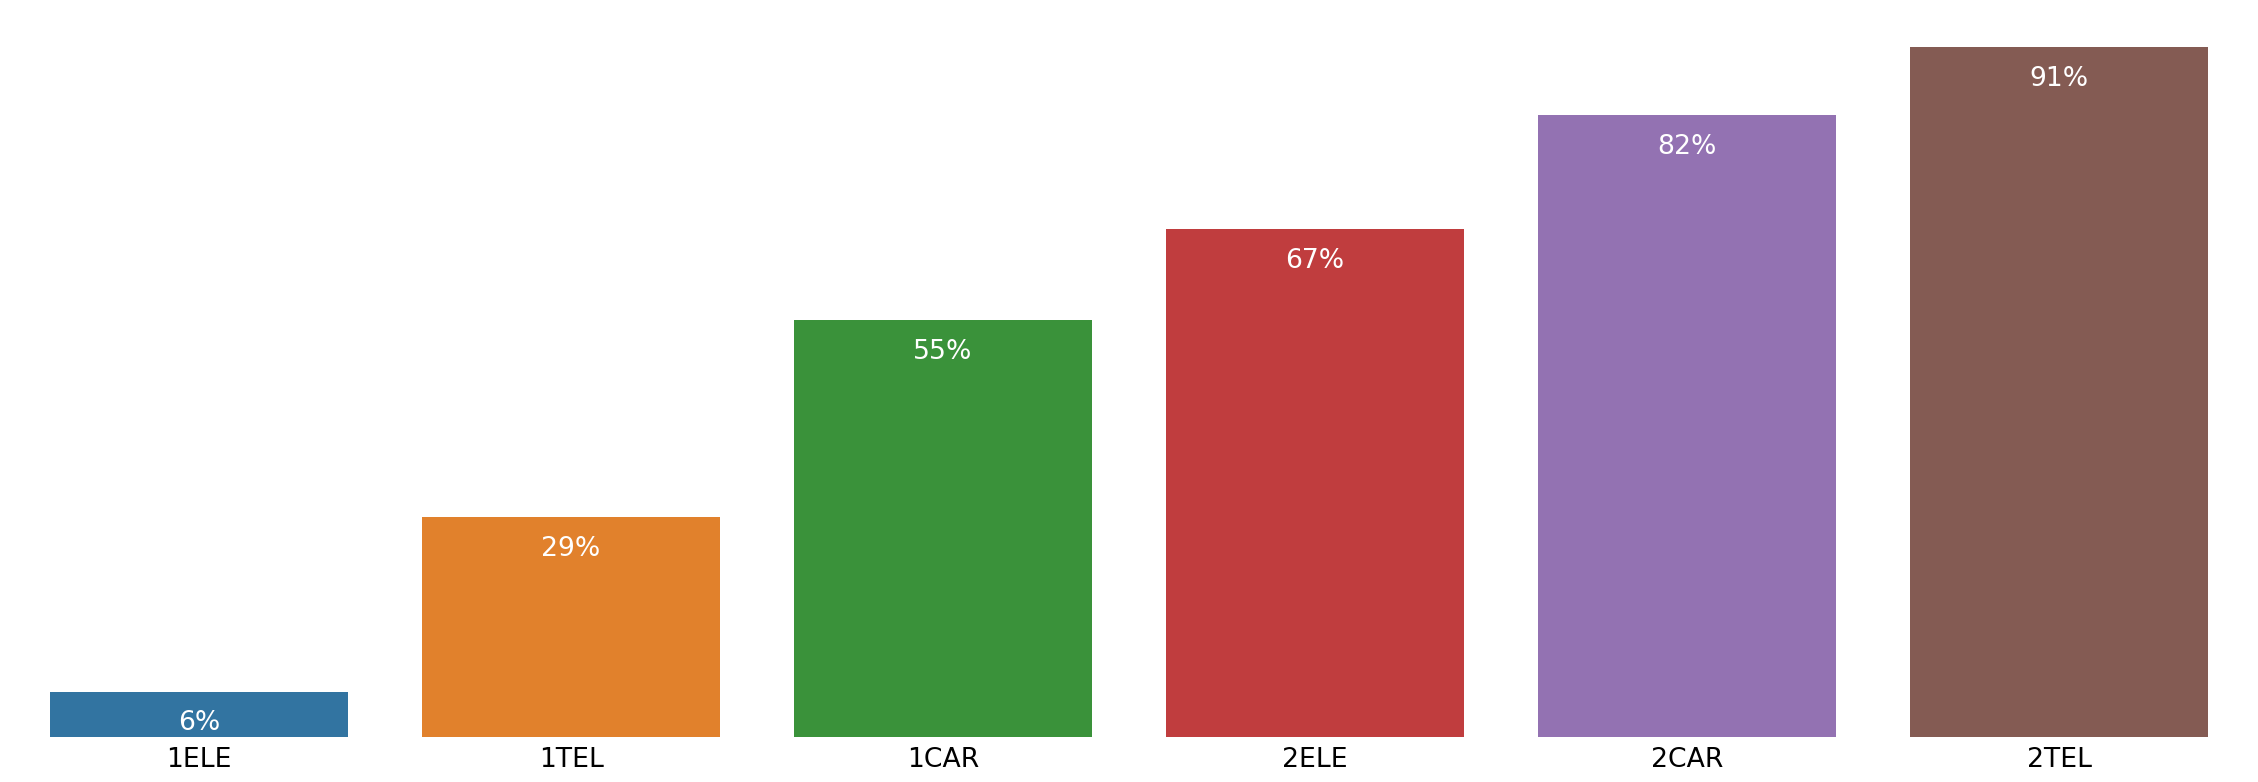

In [42]:
df_CFGM = get_data_by_stages("CFGM")
draw_academic_rate(df_CFGM.sort_values("success"), value_margin=5)

In [43]:
df_CFGM.mean()

success    55.000000
ratio      13.666667
dtype: float64

# CICLOS FORMATIVOS DE GRADO SUPERIOR

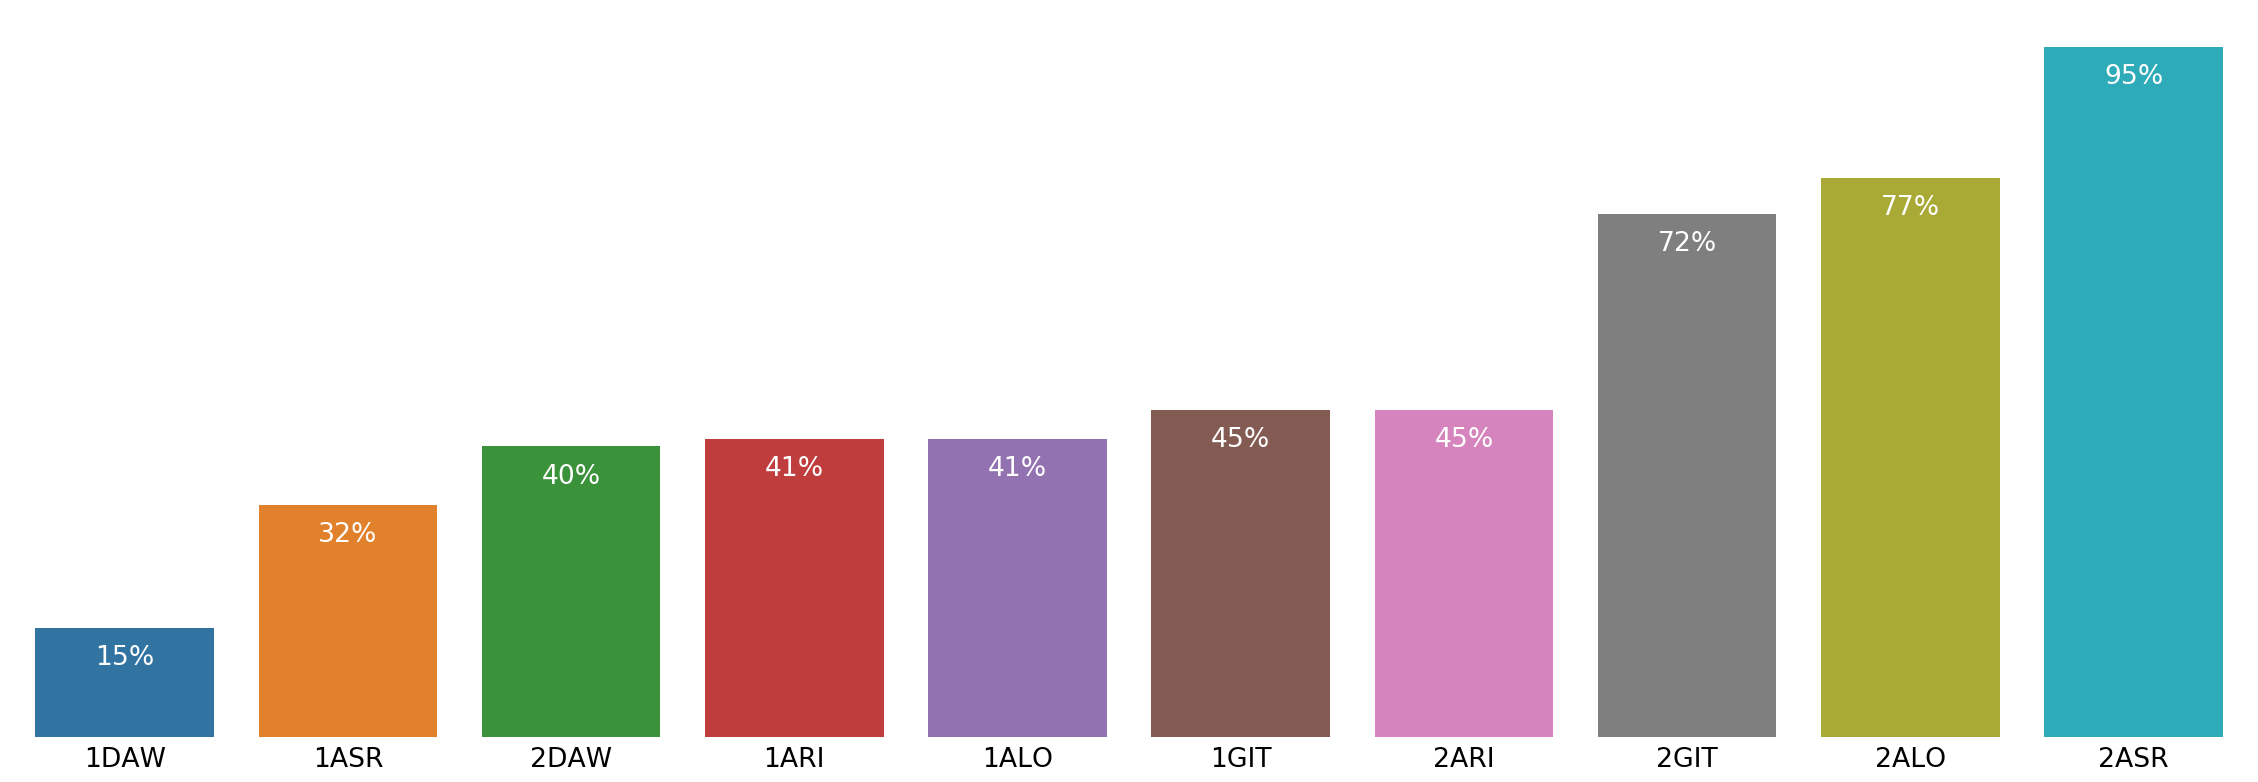

In [44]:
df_CFGS = get_data_by_stages("CFGS")
draw_academic_rate(df_CFGS.sort_values("success"), value_margin=5)

In [45]:
df_CFGS.mean()

success    50.3
ratio      21.6
dtype: float64

# TODOS LOS GRUPOS

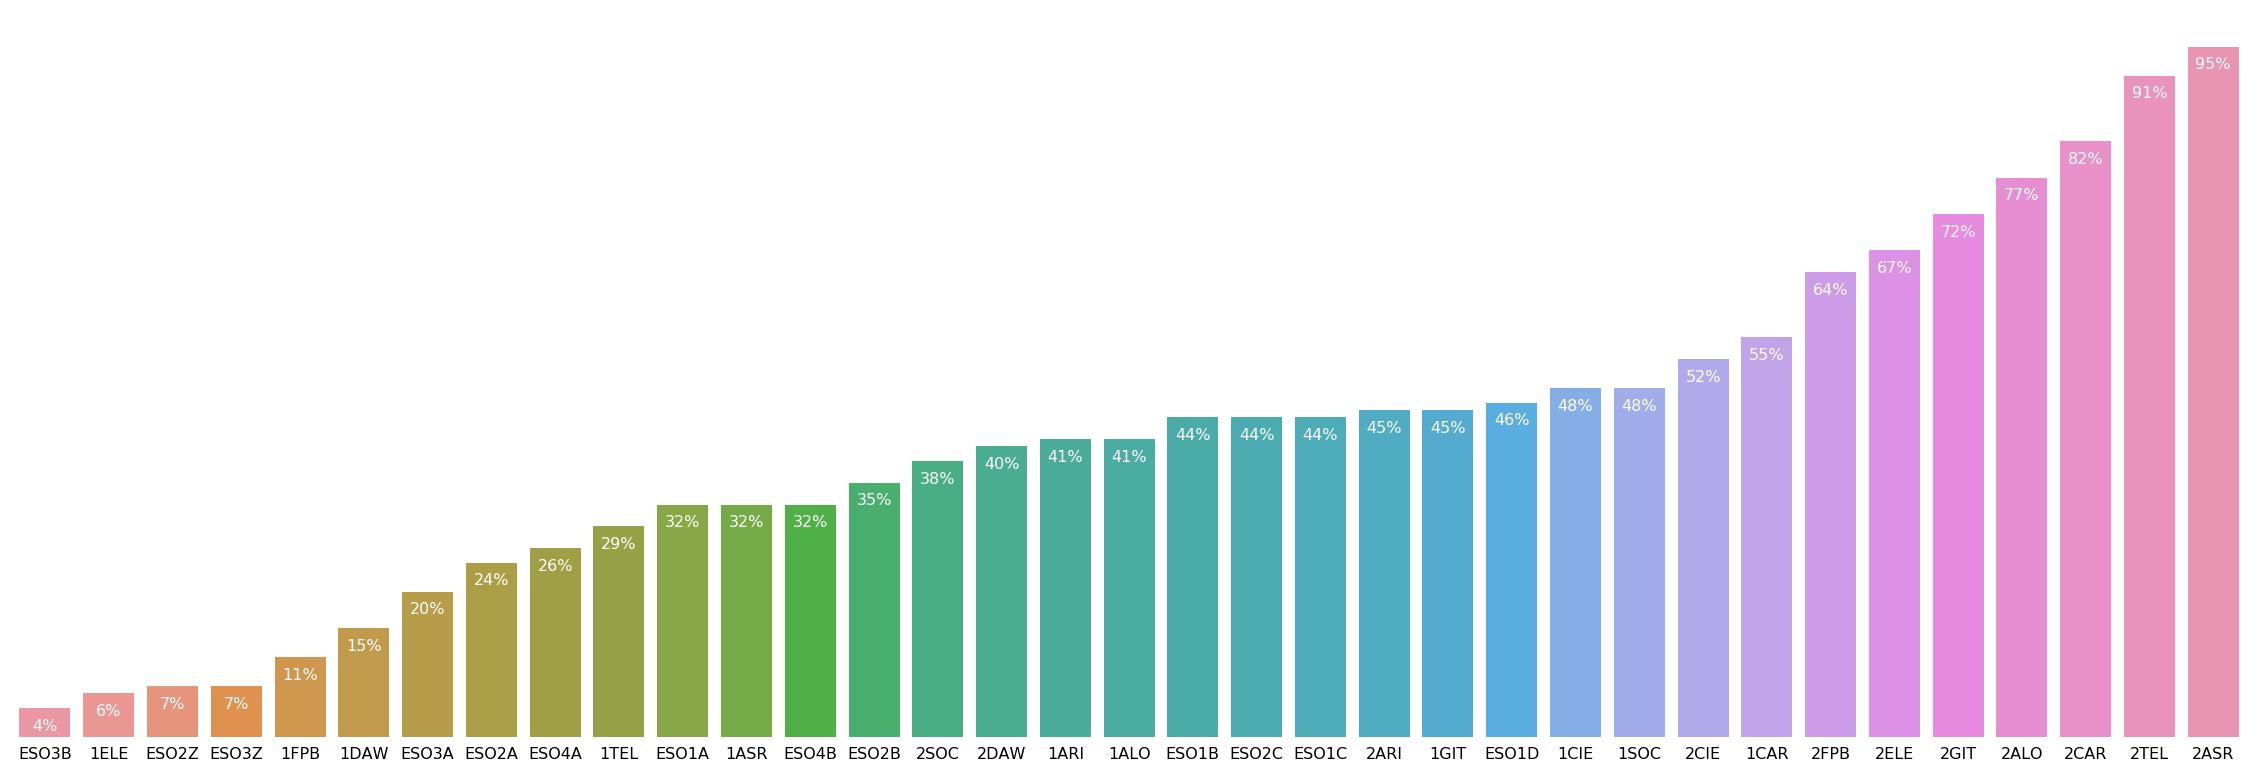

In [46]:
draw_academic_rate(df.sort_values("success"), 12)

# POR ENSEÑANZAS

In [47]:
mean_success = df["success"].mean()
display(HTML(f"<h2>Rendimiento global medio: {mean_success:.2f}%</h2>"))

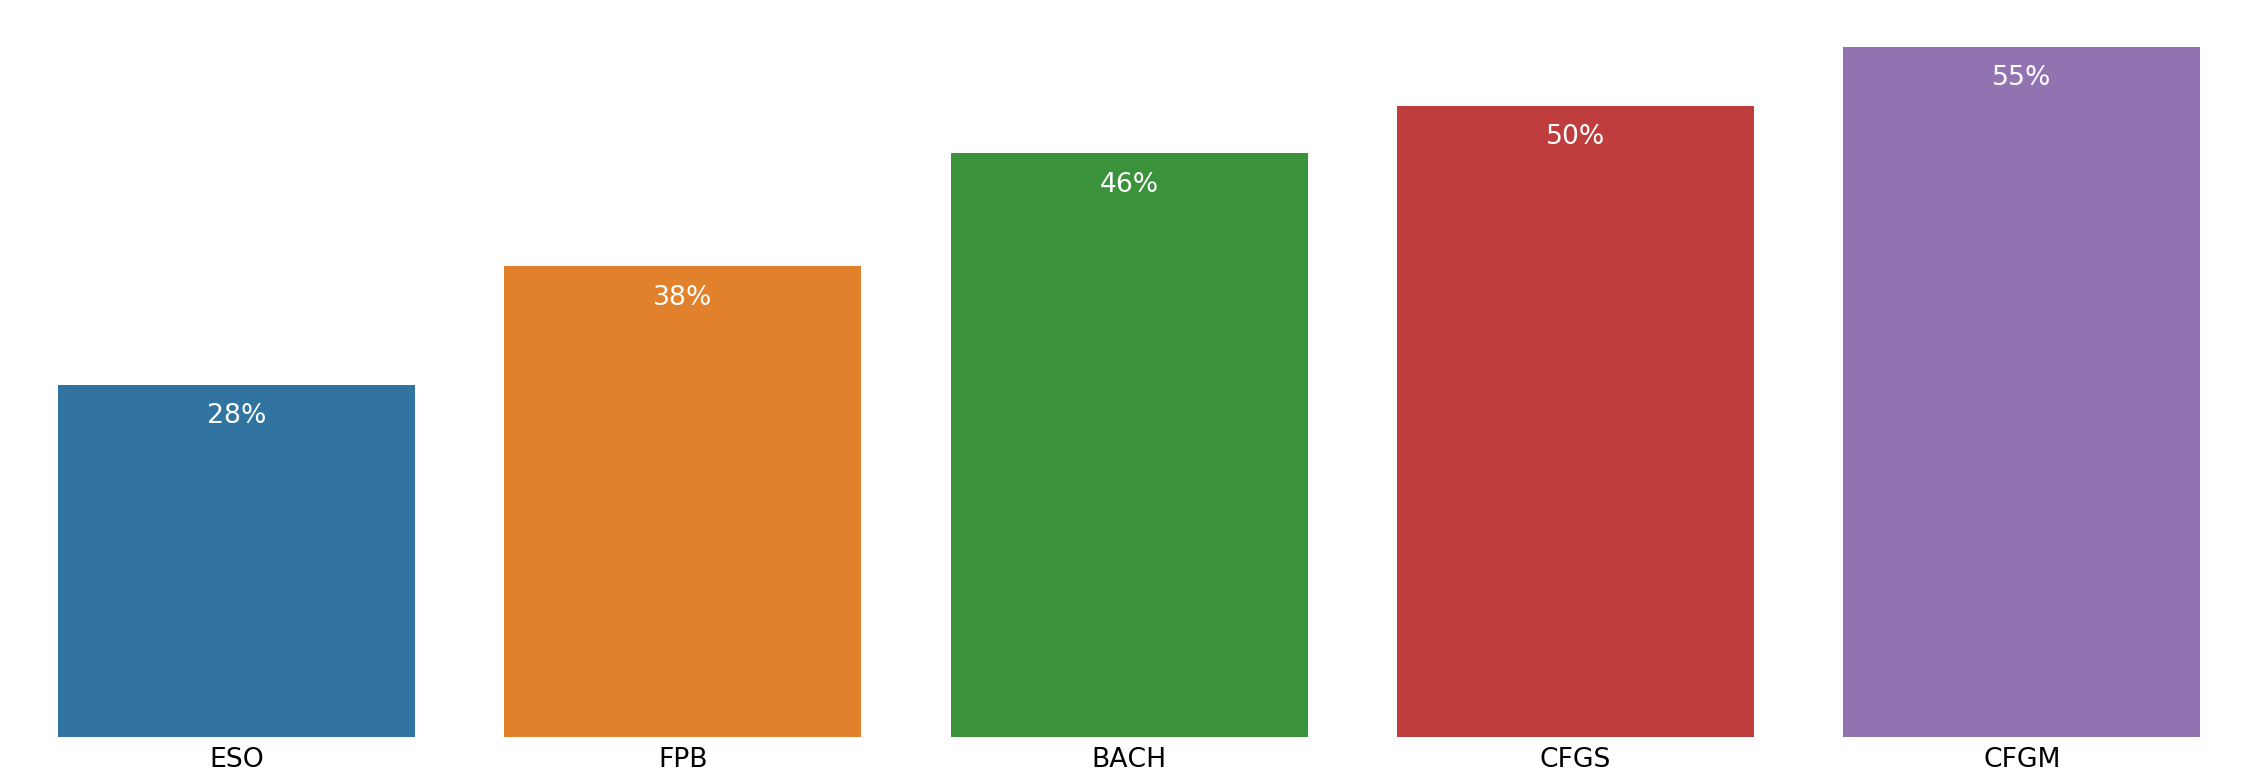

In [48]:
df_summary = df.groupby("stage").mean()
draw_academic_rate(df_summary.sort_values("success"))

# RELACIÓN `ratio-éxito`

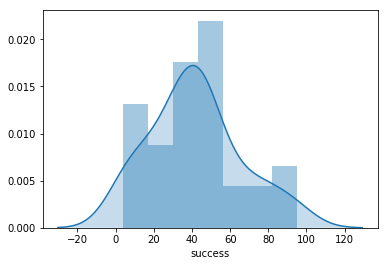

In [49]:
sns.distplot(df["success"], kde_kws={"shade": True});

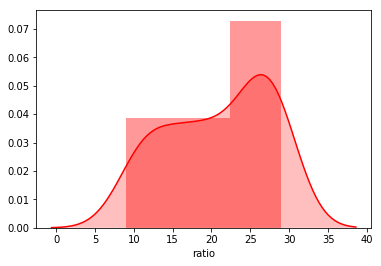

In [50]:
sns.distplot(df["ratio"], kde_kws={"shade": True}, color="red");

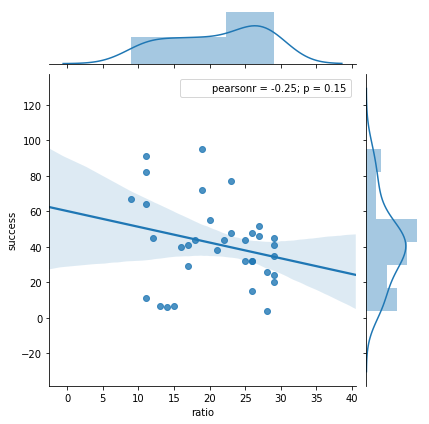

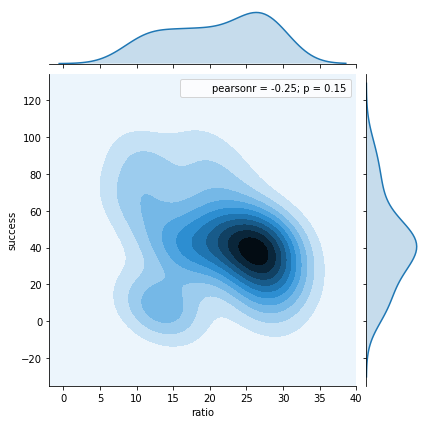

In [51]:
sns.jointplot("ratio", "success", df, kind="reg");
sns.jointplot("ratio", "success", df, kind="kde");

In [52]:
df[(df["success"] > 0) & (df["success"] < 20)
    & (df["ratio"] > 10) & (df["ratio"] < 20)]

,stage,success,ratio
group,,,
ESO2Z,ESO,7,13
ESO3Z,ESO,7,15
1FPB,FPB,11,11
1ELE,CFGM,6,14


# Análisis de Grupos

In [53]:
df["rate"] = df["success"] * df["ratio"]

## Mejor relación `ratio-éxito`

In [54]:
df.sort_values("rate", ascending=False).head(5)

,stage,success,ratio,rate
group,,,,
2ASR,CFGS,95,19,1805
2ALO,CFGS,77,23,1771
2CIE,BACH,52,27,1404
2GIT,CFGS,72,19,1368
1GIT,CFGS,45,29,1305


## Peor relación `ratio-éxito`

In [55]:
df.sort_values("rate", ascending=False).tail(5)

,stage,success,ratio,rate
group,,,,
1FPB,FPB,11,11,121
ESO3B,ESO,4,28,112
ESO3Z,ESO,7,15,105
ESO2Z,ESO,7,13,91
1ELE,CFGM,6,14,84
